<a href="https://colab.research.google.com/github/Nderwoodfrank/Music-Recommender-system/blob/main/Song_recommendation_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import pairwise_distances

In [4]:
file_url="https://raw.githubusercontent.com/Nderwoodfrank/Music-Recommender-system/refs/heads/main/song_dataset.csv"
df_songs = pd.read_csv(file_url)

In [5]:
df_songs.shape

(102627, 7)

In [ ]:
df_songs.head()

,user,song,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,Nothing from Nothing,To Die For,Billy Preston,1974
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,Under Cold Blue Stars,Under Cold Blue Stars,Josh Rouse,2002
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1,Riot Radio (Soundtrack Version),Nick & Norah's Infinite Playlist - Original Mo...,The Dead 60s,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_user = LabelEncoder()
le_song = LabelEncoder()
df_songs['user_enc'] = le_user.fit_transform(df_songs['user'])
df_songs['song_enc'] = le_song.fit_transform(df_songs['song'])

In [ ]:
#df_songs = df_songs.head(20000)
#df_subset.to_csv('song_dataset1.csv', index=True)

In [ ]:
df_songs.to_csv('song_dataset1.csv', index=True)

In [ ]:
df_songs

,user,song,play_count,title,release,artist_name,year,user_enc,song_enc
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,1453,754
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,Nothing from Nothing,To Die For,Billy Preston,1974,1453,1110
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,1453,1944
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,Under Cold Blue Stars,Under Cold Blue Stars,Josh Rouse,2002,1453,2220
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1,Riot Radio (Soundtrack Version),Nick & Norah's Infinite Playlist - Original Mo...,The Dead 60s,0,1453,2224
...,...,...,...,...,...,...,...,...,...
102622,21f4ac98aa1665bd42027ba12184a939ff435f59,SOKAKHH12AF72A5BAF,3,87,Hopeless Romantic,Bouncing Souls,1999,264,17934
102623,21f4ac98aa1665bd42027ba12184a939ff435f59,SONPOXM12A8C1440C2,4,Space Olympics,Incredibad,The Lonely Island,2009,264,24130
102624,21f4ac98aa1665bd42027ba12184a939ff435f59,SOPREHY12AB01815F9,8,I'm On A Boat,Incredibad,The Lonely Island / T-Pain,2009,264,27650
102625,21f4ac98aa1665bd42027ba12184a939ff435f59,SOQXKUV12A6D4FB4C9,3,Amityville,The Marshall Mathers LP,Eminem / Bizarre,2000,264,29708


In [ ]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102627 entries, 0 to 102626
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user         102627 non-null  object
 1   song         102627 non-null  object
 2   play_count   102627 non-null  int64 
 3   title        102627 non-null  object
 4   release      102627 non-null  object
 5   artist_name  102627 non-null  object
 6   year         102627 non-null  int64 
 7   user_enc     102627 non-null  int32 
 8   song_enc     102627 non-null  int32 
dtypes: int32(2), int64(2), object(5)
memory usage: 6.3+ MB


In [ ]:
df_songs.isnull().sum()

user           0
song           0
play_count     0
title          0
release        0
artist_name    0
year           0
user_enc       0
song_enc       0
dtype: int64

In [ ]:
unique_users = df_songs['user'].unique().shape[0]
print(f"There are {unique_users} unique users in the dataset")

There are 2042 unique users in the dataset


In [ ]:
unique_users = df_songs['song'].unique().shape[0]
print(f"There are {unique_users} songs in the dataset")

There are 44458 songs in the dataset


In [ ]:
unique_users = df_songs['artist_name'].unique().shape[0]
print(f"There are {unique_users} artists in the dataset")

There are 11928 artists in the dataset


In [ ]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102627 entries, 0 to 102626
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user         102627 non-null  object
 1   song         102627 non-null  object
 2   play_count   102627 non-null  int64 
 3   title        102627 non-null  object
 4   release      102627 non-null  object
 5   artist_name  102627 non-null  object
 6   year         102627 non-null  int64 
 7   user_enc     102627 non-null  int32 
 8   song_enc     102627 non-null  int32 
dtypes: int32(2), int64(2), object(5)
memory usage: 6.3+ MB


### most listened songs

In [ ]:
most_listened_songs = df_songs.groupby('title')['play_count'].sum().reset_index(name='total_play_count').sort_values(['total_play_count', 'title'], ascending = [0,1])
most_listened_songs = most_listened_songs[:10]
most_listened_songs

,title,total_play_count
39228,Words,1919
39947,You're The One,1741
27437,Revelry,1490
36840,Undo,1443
14515,Horn Concerto No. 4 in E flat K495: II. Romanc...,921
25275,Paradise & Dreams,805
28815,Sehr kosmisch,795
28758,Secrets,712
30515,Somebody To Love,697
37034,Use Somebody,660


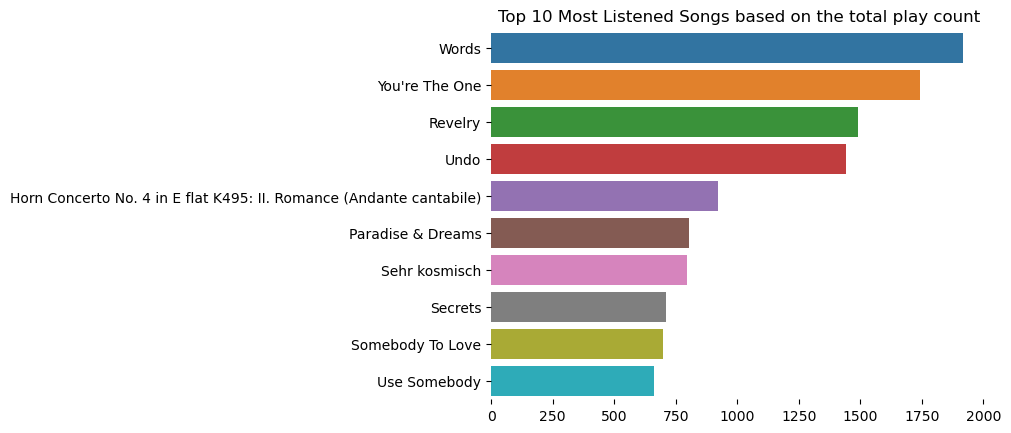

In [ ]:
labels = most_listened_songs['title'].tolist()
counts = most_listened_songs['total_play_count'].tolist()
plt.figure()
plt.title('Top 10 Most Listened Songs based on the total play count')
sns.barplot(x=counts, y=labels)
sns.despine(left=True, bottom=True)

In [ ]:
ten_pop_songs = df_songs.groupby('title')['play_count'].count().reset_index().sort_values(['play_count', 'title'], ascending = [0,1])
ten_pop_songs = ten_pop_songs[:10]
ten_pop_songs

,title,play_count
28815,Sehr kosmisch,221
37034,Use Somebody,214
36840,Undo,197
39947,You're The One,192
8449,Dog Days Are Over (Radio Edit),190
27437,Revelry,178
28758,Secrets,175
30515,Somebody To Love,158
20323,Love Story,157
39479,Yellow,155


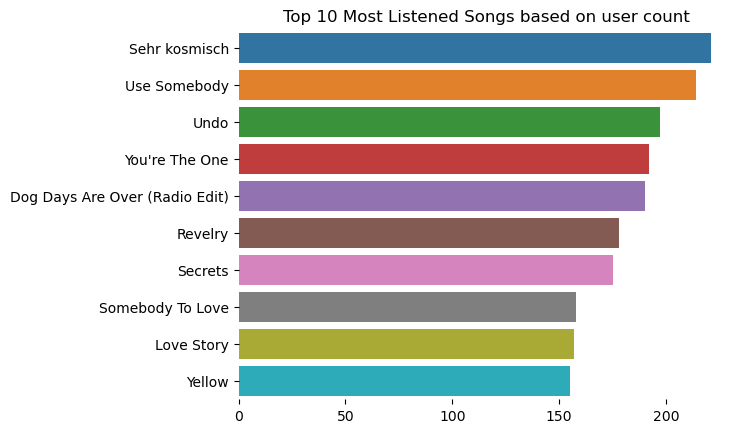

In [ ]:
labels = ten_pop_songs['title'].tolist()
counts = ten_pop_songs['play_count'].tolist()
plt.figure()
plt.title('Top 10 Most Listened Songs based on user count')
sns.barplot(x=counts, y=labels)
sns.despine(left=True, bottom=True)

### popular artist

In [ ]:
most_popular_artists = df_songs.groupby('artist_name')['play_count'].sum().reset_index(name='total_play_count').sort_values(by='total_play_count', ascending=False).head(10)
most_popular_artists

,artist_name,total_play_count
5686,Kings Of Leon,2765
10056,The Black Keys,1912
4726,Jack the Ripper,1890
2150,Coldplay,1830
3089,Dwight Yoakam,1705
3676,Florence + The Machine,1682
3288,Eminem,1650
1188,Björk,1526
5403,Justin Bieber,1504
4195,Guns N' Roses,1309


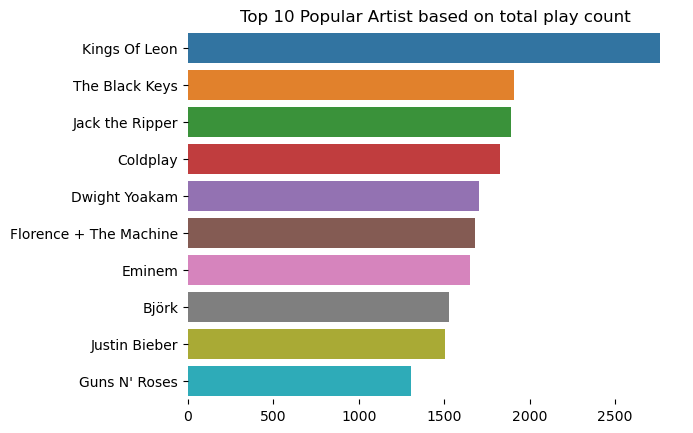

In [ ]:
plt.figure()
labels = most_popular_artists['artist_name'].tolist()
counts = most_popular_artists['total_play_count'].tolist()
plt.title('Top 10 Popular Artist based on total play count')
sns.barplot(x=counts, y=labels)
sns.despine(left=True, bottom=True)

In [ ]:
ten_pop_artists  = df_songs.groupby(['artist_name'])['play_count'].count().reset_index().sort_values(['play_count', 'artist_name'],                                                                                               ascending = [0,1])
ten_pop_artists = ten_pop_artists[:10]
ten_pop_artists

,artist_name,play_count
2150,Coldplay,906
5686,Kings Of Leon,769
10056,The Black Keys,689
3288,Eminem,577
4713,Jack Johnson,533
3676,Florence + The Machine,496
7253,Muse,461
10415,The Killers,455
8315,Radiohead,454
5403,Justin Bieber,449


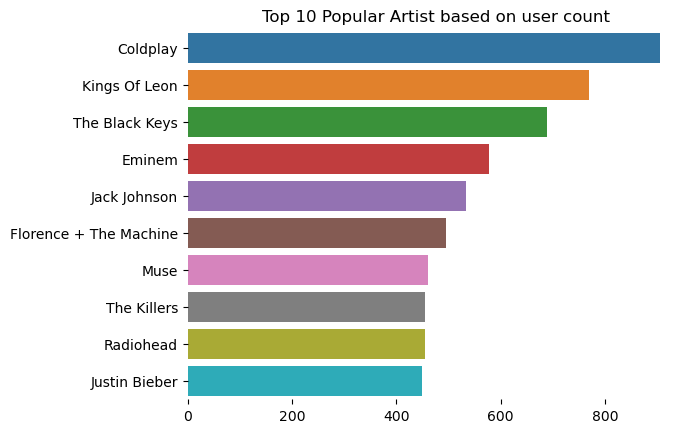

In [ ]:
plt.figure()
labels = ten_pop_artists['artist_name'].tolist()
counts = ten_pop_artists['play_count'].tolist()
plt.title('Top 10 Popular Artist based on user count')
sns.barplot(x=counts, y=labels)
sns.despine(left=True, bottom=True)

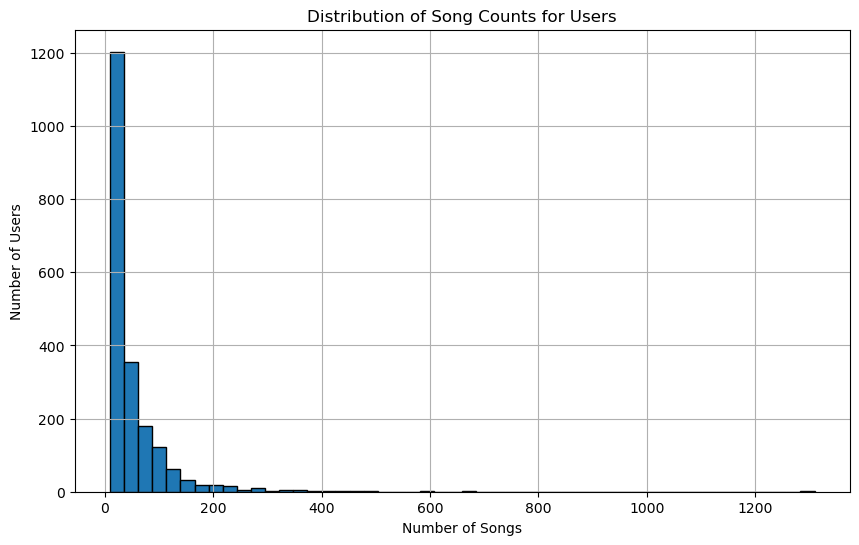

In [ ]:
user_song_counts = df_songs.groupby('user')['song'].count().reset_index(name='song_count')
plt.figure(figsize=(10, 6))
user_song_counts['song_count'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Song Counts for Users')
plt.xlabel('Number of Songs')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

## recommendation engine

In [ ]:
df_songs['play_count'] = df_songs['play_count'].apply(lambda x: 1 if x >= 1 else 0)

In [ ]:
user_item_matrix = df_songs.pivot_table(index='user', columns='song', values='play_count').fillna(0)

In [ ]:
user_item_matrix = user_item_matrix.applymap(lambda x: 1 if x != 0 else 0)

In [ ]:
user_item_matrix

song,SOAAAGQ12A8C1420C8,SOAABMP12A6D4F7633,SOAABVA12AC3DF673F,SOAACPJ12A81C21360,SOAACTC12AB0186A20,SOAADCB12A81C22AFA,SOAAEJI12AB0188AB5,SOAAEKX12A6D4F7E4E,SOAAFAC12A67ADF7EB,SOAAFBZ12AB01842D7,...,SOZZWTD12AF72A4FA1,SOZZWZV12A67AE140F,SOZZXAO12A58A7D379,SOZZXOX12A8AE47ED6,SOZZXZP12AB0180443,SOZZYAO12A6701FF36,SOZZYDA12AB01824FB,SOZZYMH12AB0180A51,SOZZZBY12A8C139058,SOZZZFB12A8AE45CDC
user,,,,,,,,,,,,,,,,,,,,,
0007c0e74728ca9ef0fe4eb7f75732e8026a278b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000ebc858861aca26bac9b49f650ed424cf882fc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00342a0cdf56a45465f09a39040a5bc25b7d0046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0039bd8483d578997718cdc0bf6c7c88b679f488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00498f4bab2bfeb17680113c7d9525ad5b0ad401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffa24617ea80c268c74e86cd3ee3d9e7ac5504ec,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ffadf9297a99945c0513cd87939d91d8b602936b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ffdaab327f2fc6b9fa01a4e3e7f41fdd0e468046,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
user_similarity = 1 - pairwise_distances(user_item_matrix.values, metric="jaccard")
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

C:\Users\prade\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [ ]:
user_similarity_df

user,0007c0e74728ca9ef0fe4eb7f75732e8026a278b,000ebc858861aca26bac9b49f650ed424cf882fc,00342a0cdf56a45465f09a39040a5bc25b7d0046,0039bd8483d578997718cdc0bf6c7c88b679f488,00498f4bab2bfeb17680113c7d9525ad5b0ad401,006edf2afa5cba7e65ccc97892021a129d7012dd,00a443baf550f4bbdd974ba73720abf2759166f3,00f09427308b2cfe93499bc96f6d2f2f7c65bbf7,00f51c1ca1385bbfd80de6fe313936e69cde7f41,01388705af361a3ded407ef2aa51fde175a73f64,...,fedb2196791cf130661f6566f772790ca37e1c40,ff18ea9a13583f7f7aaa83719e0b22ce5618e9cf,ff3a54c32ae353b78711f74251eee8611f5dfd12,ff4322e94814d3c7895d07e6f94139b092862611,ff753593746245c03b354e126e14cbf7086adffb,ffa24617ea80c268c74e86cd3ee3d9e7ac5504ec,ffadf9297a99945c0513cd87939d91d8b602936b,ffdaab327f2fc6b9fa01a4e3e7f41fdd0e468046,ffe50146303f1b12ea8254450b95580b1b99a5c4,fffce9c1537fbc350ea68823d956eaa8f5236dbe
user,,,,,,,,,,,,,,,,,,,,,
0007c0e74728ca9ef0fe4eb7f75732e8026a278b,1.00000,0.004090,0.000000,0.000000,0.0,0.024096,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.025,0.000000,0.0,0.000000
000ebc858861aca26bac9b49f650ed424cf882fc,0.00409,1.000000,0.000000,0.000000,0.0,0.001821,0.001894,0.000000,0.000000,0.00000,...,0.005906,0.000000,0.000000,0.00202,0.001845,0.001938,0.000,0.001140,0.0,0.000000
00342a0cdf56a45465f09a39040a5bc25b7d0046,0.00000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000,0.000000,0.0,0.006849
0039bd8483d578997718cdc0bf6c7c88b679f488,0.00000,0.000000,0.000000,1.000000,0.0,0.000000,0.017699,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.032000,0.000000,0.000,0.000000,0.0,0.026087
00498f4bab2bfeb17680113c7d9525ad5b0ad401,0.00000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.019608,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffa24617ea80c268c74e86cd3ee3d9e7ac5504ec,0.00000,0.001938,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000,0.000000,0.0,0.000000
ffadf9297a99945c0513cd87939d91d8b602936b,0.02500,0.000000,0.000000,0.000000,0.0,0.010101,0.012821,0.000000,0.000000,0.00000,...,0.000000,0.032609,0.000000,0.00000,0.000000,0.000000,1.000,0.000000,0.0,0.000000
ffdaab327f2fc6b9fa01a4e3e7f41fdd0e468046,0.00000,0.001140,0.000000,0.000000,0.0,0.000000,0.000000,0.002299,0.002427,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.006494,0.000000,0.000,1.000000,0.0,0.004425


In [ ]:
def recommend_songs(user_id, user_item_matrix, user_similarity_df, df_songs, top_n=10):
    user_history = user_item_matrix.loc[user_id]
    recommendations = user_similarity_df.loc[user_id] @ user_item_matrix
    recommendations = recommendations[user_history == 0]
    recommendations = recommendations.sort_values(ascending=False)
    top_recommendations = recommendations.head(top_n)
    song_to_title = dict(zip(df_songs['song'], df_songs['title']))
    recommendation_titles = [song_to_title.get(song, "Title not found") for song in top_recommendations.index]
    return recommendation_titles

In [ ]:
user_id_to_recommend = "0152fcbd02b172a874c75a57a913f0f0109ba272"
recommendations = recommend_songs(user_id_to_recommend, user_item_matrix, user_similarity_df, df_songs)
print("Top Recommendations for User {}: {}".format(user_id_to_recommend, recommendations))

Top Recommendations for User 0152fcbd02b172a874c75a57a913f0f0109ba272: ['Sehr kosmisch', 'Fireflies', 'Secrets', 'Marry Me', 'Dog Days Are Over (Radio Edit)', 'OMG', 'Love Story', 'Use Somebody', 'Billionaire [feat. Bruno Mars]  (Explicit Album Version)', 'Lucky (Album Version)']


In [ ]:
import pickle
with open('model_data.pkl', 'wb') as file:
    pickle.dump({
        'user_item_matrix': user_item_matrix,
        'user_similarity_df': user_similarity_df,
    }, file)